In [4]:
import pandas as pd
import numpy as np
from sklearn.metrics import cohen_kappa_score
import matplotlib.pyplot as plt

In [5]:
#Récupération des données
dataJulien = pd.read_csv("SousCorpusMessagesJulien.csv",encoding='latin-1')
dataJose = pd.read_csv("SousCorpusMessagesJose.csv",encoding='latin-1')
dataChloe = pd.read_csv("SousCorpusMessagesChloe.csv",encoding='latin-1')
dataSebastien = pd.read_csv("SousCorpusMessagesSebastien.csv",encoding='latin-1')
dataJulien.head(2)

,ï»¿messageID,user,role,message,groupID,fileID,date,time,seanceID,Forme,Contenu,Nature
0,24,145797.0,Driver,tu pense si je fais un for in in range avec un...,4,1db9dee2-2702-457f-aa07-6b60589446ce,2024-10-09,04:25:31,1,Question,Mots clefs python,Demande d'aide
1,30,200807.0,Navigator,"en vrai c'est pas mieux de faire un ""if len(a)...",4,1db9dee2-2702-457f-aa07-6b60589446ce,2024-10-09,04:28:50,1,Explication,Mots clefs python,Informations sur comment proceder


In [6]:
dataJulien.columns

Index(['ï»¿messageID', 'user', 'role', 'message', 'groupID', 'fileID', 'date',
       'time', 'seanceID', 'Forme', 'Contenu', 'Nature'],
      dtype='object')

In [7]:
dataJulien['Forme']

0        Question
1     Explication
2     Description
3      Correction
4      Correction
5      Validation
6        Question
7     Description
8           Autre
9     Explication
10    Instruction
11    Explication
12     Validation
13    Explication
14    Explication
15       Question
16     Validation
17    Explication
18    Explication
19     Validation
20    Instruction
21       Question
22    Instruction
23          Autre
24    Explication
25    Instruction
26    Explication
27    Instruction
28    Instruction
29    Explication
30    Description
31    Explication
32    Description
33       Question
34          Autre
35    Explication
36    Explication
37    Description
38    Explication
39    Explication
40    Instruction
41    Explication
42       Question
43    Explication
44          Autre
45    Instruction
46    Explication
47    Instruction
Name: Forme, dtype: object

In [8]:
dataJose.head(3)

,ï»¿messageID,user,role,message,groupID,fileID,date,time,seanceID,Forme,Contenu,Nature,Unnamed: 12,Forme v2 ( 3 valeurs ),Forme v2 (4 valeurs),Forme v3
0,24,145797.0,Driver,tu pense si je fais un for in in range avec un...,4,1db9dee2-2702-457f-aa07-6b60589446ce,2024-10-09,04:25:31,1,Question,Mots clefs python,Demande d'aide,NaN,instruction,instruction,autre
1,30,200807.0,Navigator,"en vrai c'est pas mieux de faire un ""if len(a)...",4,1db9dee2-2702-457f-aa07-6b60589446ce,2024-10-09,04:28:50,1,Question,Mots clefs python,Informations sur comment proceder,NaN,instruction,correction,instruction
2,34,200807.0,Navigator,quand je teste le code il me disent y'a des er...,4,1db9dee2-2702-457f-aa07-6b60589446ce,2024-10-09,04:30:08,1,Description,Concepts cles de programmation,"Erreurs, idees fausses",NaN,explication,explication,explication


In [9]:
#Kappa deux à deux avec la librairie
noms = ["Julien-Chloe","Julien-Jose","Jose-Chloe","Jose-Sebastien","Sebastien-Julien","Sebastien-Chloe"]

score_forme = []
score_forme.append(cohen_kappa_score(dataJulien['Forme'].to_numpy(),dataChloe['Forme ( du contenu )'].to_numpy()))
score_forme.append(cohen_kappa_score(dataJulien['Forme'].to_numpy(),dataJose['Forme'].to_numpy()))
score_forme.append(cohen_kappa_score(dataJose['Forme'].to_numpy(),dataChloe['Forme ( du contenu )'].to_numpy()))
score_forme.append(cohen_kappa_score(dataJose['Forme'].to_numpy(),dataSebastien['Forme'].to_numpy()))
score_forme.append(cohen_kappa_score(dataSebastien['Forme'].to_numpy(),dataJulien['Forme'].to_numpy()))
score_forme.append(cohen_kappa_score(dataSebastien['Forme'].to_numpy(),dataChloe['Forme ( du contenu )'].to_numpy()))

score_contenu=[]
score_contenu.append(cohen_kappa_score(dataJulien['Contenu'].to_numpy(),dataChloe['Contenu'].to_numpy()))
score_contenu.append(cohen_kappa_score(dataJulien['Contenu'].to_numpy(),dataJose['Contenu'].to_numpy()))
score_contenu.append(cohen_kappa_score(dataJose['Contenu'].to_numpy(),dataChloe['Contenu'].to_numpy()))
score_contenu.append(cohen_kappa_score(dataJose['Contenu'].to_numpy(),dataSebastien['Contenu'].to_numpy()))
score_contenu.append(cohen_kappa_score(dataSebastien['Contenu'].to_numpy(),dataJulien['Contenu'].to_numpy()))
score_contenu.append(cohen_kappa_score(dataSebastien['Contenu'].to_numpy(),dataChloe['Contenu'].to_numpy()))

score_nature = []
score_nature.append(cohen_kappa_score(dataJulien['Nature'].to_numpy(),dataChloe['Nature'].to_numpy()))
score_nature.append(cohen_kappa_score(dataJulien['Nature'].to_numpy(),dataJose['Nature'].to_numpy()))
score_nature.append(cohen_kappa_score(dataJose['Nature'].to_numpy(),dataChloe['Nature'].to_numpy()))
score_nature.append(cohen_kappa_score(dataJose['Nature'].to_numpy(),dataSebastien['Nature'].to_numpy()))
score_nature.append(cohen_kappa_score(dataSebastien['Nature'].to_numpy(),dataJulien['Nature'].to_numpy()))
score_nature.append(cohen_kappa_score(dataSebastien['Nature'].to_numpy(),dataChloe['Nature'].to_numpy()))

score_forme,score_contenu,score_nature

([np.float64(0.29304215337734896),
  np.float64(0.38587512794268175),
  np.float64(0.5268346111719606),
  np.float64(0.4453781512605043),
  np.float64(0.415282392026578),
  np.float64(0.41214057507987223)],
 [np.float64(0.32155477031802115),
  np.float64(0.5054545454545454),
  np.float64(0.4070588235294117),
  np.float64(0.23010487353485487),
  np.float64(0.21786360893180456),
  np.float64(0.23684210526315785)],
 [np.float64(0.19565217391304346),
  np.float64(0.45127925966249316),
  np.float64(0.4181818181818182),
  np.float64(0.4025974025974026),
  np.float64(0.3344425956738769),
  np.float64(0.29118597138901714)])

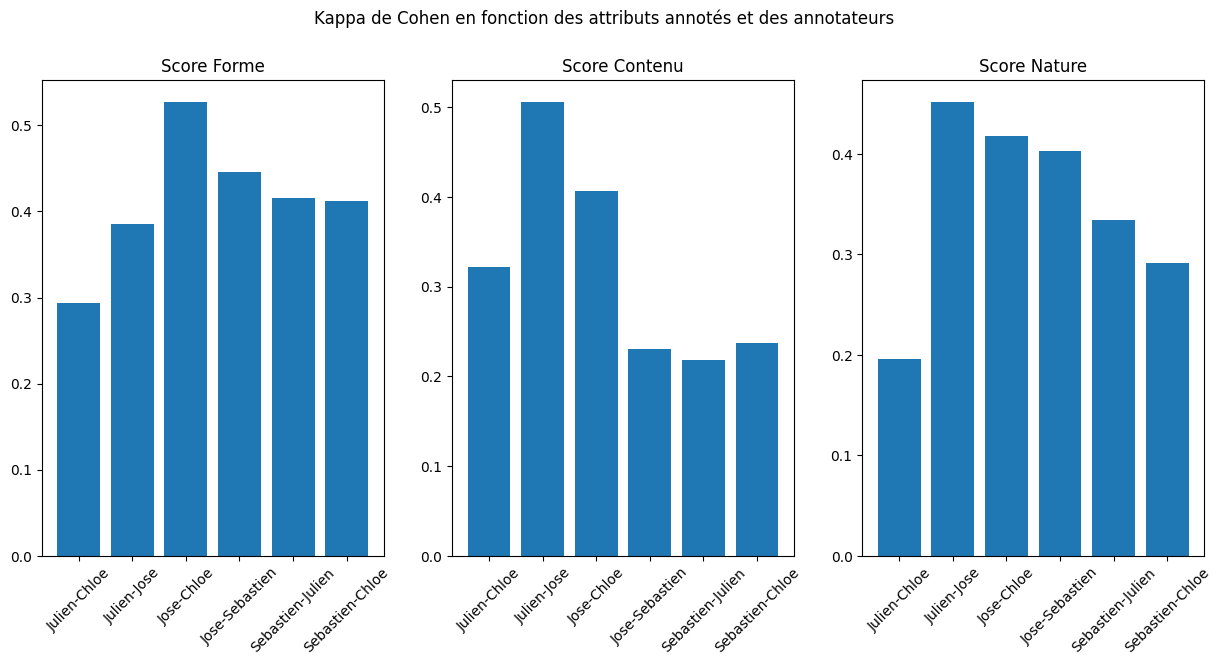

In [10]:
f, (ax1, ax2,ax3) = plt.subplots(1, 3)
f.set_figheight(7)
f.set_figwidth(15)
f.subplots_adjust(bottom=0.2)

ax1.bar(noms, score_forme)
ax1.tick_params(axis='x', labelrotation=45)
ax1.set_title('Score Forme')  # Title for first subplot

ax2.bar(noms, score_contenu)
ax2.tick_params(axis='x', labelrotation=45)
ax2.set_title('Score Contenu')  # Title for second subplot

ax3.bar(noms, score_nature)
ax3.tick_params(axis='x', labelrotation=45)
ax3.set_title('Score Nature')  # Title for third subplot
f.suptitle("Kappa de Cohen en fonction des attributs annotés et des annotateurs")
plt.show()

In [11]:
#Kappa à plus de deux graders || kappa de fleiss
from statsmodels.stats.inter_rater import fleiss_kappa
from statsmodels.stats.inter_rater import aggregate_raters


In [12]:
agreg_forme = aggregate_raters(np.array([dataJulien['Forme'].to_numpy(),dataChloe['Forme ( du contenu )'].to_numpy(),dataJose['Forme'].to_numpy(),dataSebastien['Forme'].to_numpy()]).transpose())
multi_score_forme = fleiss_kappa(agreg_forme[0])

agreg_contenu = aggregate_raters(np.array([dataJulien['Contenu'].to_numpy(),dataChloe['Contenu'].to_numpy(),dataJose['Contenu'].to_numpy(),dataSebastien['Contenu'].to_numpy()]).transpose())
multi_score_contenu = fleiss_kappa(agreg_contenu[0])

agreg_nature = aggregate_raters(np.array([dataJulien['Nature'].to_numpy(),dataChloe['Nature'].to_numpy(),dataJose['Nature'].to_numpy(),dataSebastien['Nature'].to_numpy()]).transpose())
multi_score_nature = fleiss_kappa(agreg_nature[0])

multi_score_forme,multi_score_contenu,multi_score_nature

(np.float64(0.402391508800215),
 np.float64(0.30888638920134986),
 np.float64(0.32674791533034))

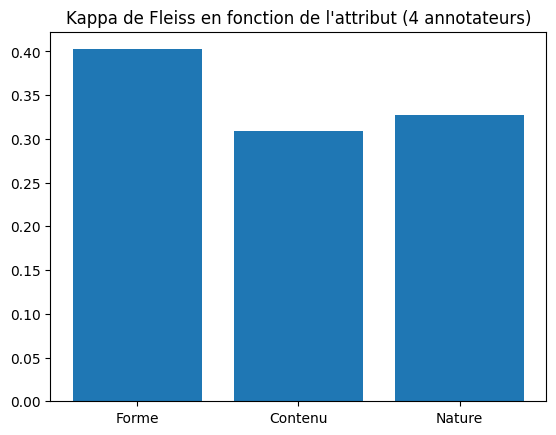

In [13]:
plt.bar(["Forme","Contenu","Nature"],[multi_score_forme,multi_score_contenu,multi_score_nature])

plt.title("Kappa de Fleiss en fonction de l'attribut (4 annotateurs)")
plt.show()

#### Tests avec moins de valeurs pour forme

In [14]:
print("3 attributs : " + str(cohen_kappa_score(dataJose['Forme v2 ( 3 valeurs )'].to_numpy(),dataChloe['Forme v2 ( 3 valeurs )'].to_numpy())))

3 attributs : 0.5675675675675675


In [15]:
print("4 attributs : " + str(cohen_kappa_score(dataJose['Forme v2 (4 valeurs)'].to_numpy(),dataChloe['Forme v2 (4 valeurs)'].to_numpy())))

4 attributs : 0.4600000000000001


#### Avec attribut "autre"

In [16]:
print("3 attributs + autre : " + str(cohen_kappa_score(dataJose['Forme v3'].to_numpy(),dataChloe['Forme v3'].to_numpy())))

3 attributs + autre : 0.5025906735751295


#### Kappa pour le rapport

In [17]:
annotated = pd.read_csv("classified_by_hand.csv",encoding='latin-1',index_col = 0)
notAnnotated = pd.read_csv("classified_test.csv",encoding='latin-1',index_col=0)
annotated.head(2)

,seance_ID,groupe_ID,role,messageID,utterance_num,message,forme,ton,content,nature
0,np.int64(1),np.int64(4),Driver,22,0,Bonjour,positiveSentence,positiveTone,notRelatedToProgramming_Other,noFeedback
1,np.int64(1),np.int64(4),Navigator,23,0,Bonjour,positiveSentence,positiveTone,notRelatedToProgramming_Other,noFeedback


In [18]:
notAnnotated.head(2)

,seance_ID,groupe_ID,role,messageID,utterance_num,message,forme,ton,content,nature
0,np.int64(1),np.int64(4),Driver,22,0,Bonjour,positiveSentence,positiveTone,notRelatedToProgramming_Other,noFeedback
1,np.int64(1),np.int64(4),Navigator,23,0,Bonjour,positiveSentence,positiveTone,notRelatedToProgramming_Other,noFeedback


In [19]:
cols = ['forme','content','nature']
scores = []
for col in cols:
    scores.append(cohen_kappa_score(annotated[col],notAnnotated[col]))
scores   

[np.float64(0.9285714285714286),
 np.float64(0.7630331753554502),
 np.float64(0.3224932249322493)]

Nan pour ton est sûrement dû au fait qu'il n'y ait qu'une catégorie.

[]

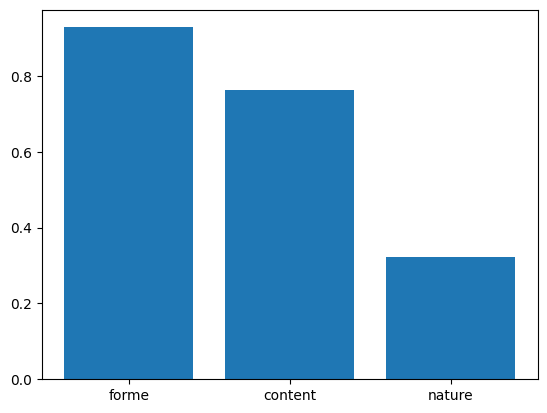

In [20]:
plt.bar(cols,scores)
plt.plot()

##### Matrices de contingence

In [28]:
from sklearn.metrics.cluster import contingency_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

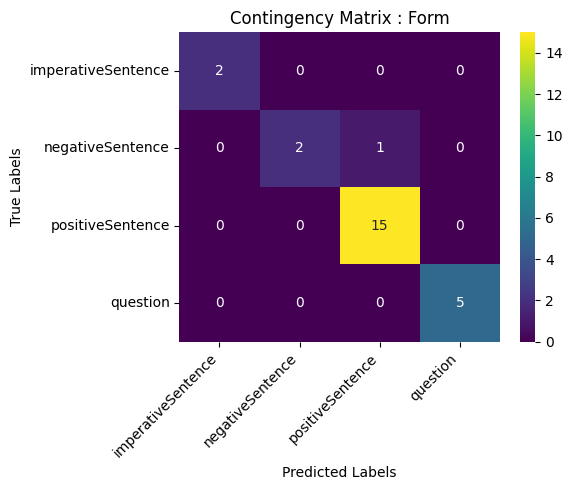

In [37]:
matrix = contingency_matrix(annotated['forme'],notAnnotated['forme'])



# Create a DataFrame with labels
df = pd.DataFrame(
    matrix,
    index=np.unique(annotated['forme']),
    columns=np.unique(notAnnotated['forme'])
)

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(df, annot=True, fmt="d", cmap="viridis", cbar=True)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.yticks(rotation=0)  
plt.title("Contingency Matrix : Form")
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")
plt.tight_layout()
plt.show()

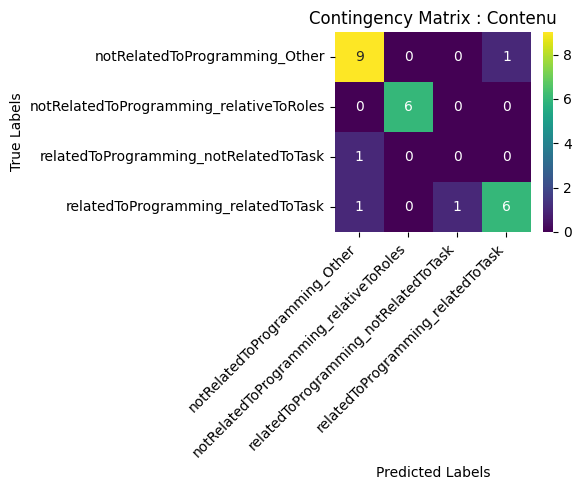

In [35]:
matrix = contingency_matrix(annotated['content'],notAnnotated['content'])



# Create a DataFrame with labels
df = pd.DataFrame(
    matrix,
    index=np.unique(annotated['content']),
    columns=np.unique(notAnnotated['content'])
)

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(df, annot=True, fmt="d", cmap="viridis", cbar=True)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.yticks(rotation=0)  
plt.title("Contingency Matrix : Contenu")
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")
plt.tight_layout()
plt.show()

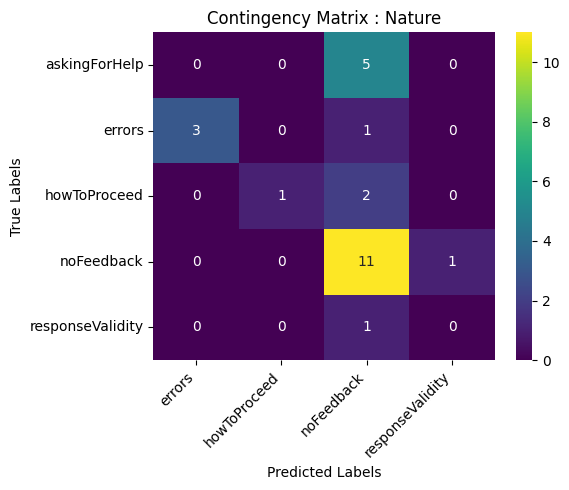

In [36]:
matrix = contingency_matrix(annotated['nature'],notAnnotated['nature'])


# Create a DataFrame with labels
df = pd.DataFrame(
    matrix,
    index=np.unique(annotated['nature']),
    columns=np.unique(notAnnotated['nature'])
)

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(df, annot=True, fmt="d", cmap="viridis", cbar=True)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.yticks(rotation=0)  
plt.title("Contingency Matrix : Nature")
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")
plt.tight_layout()
plt.show()